In [16]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import datashader as ds
import datashader.transfer_functions as tf

In [2]:
temp0 = pd.read_csv(filepath_or_buffer='archive\deaths\kill_match_stats_final_0.csv')
print('final0 complete')
temp1 = pd.read_csv(filepath_or_buffer='archive\deaths\kill_match_stats_final_1.csv')
print('final1 complete')
temp2 = pd.read_csv(filepath_or_buffer='archive\deaths\kill_match_stats_final_2.csv')
print('final2 complete')
temp3 = pd.read_csv(filepath_or_buffer='archive\deaths\kill_match_stats_final_3.csv')
print('final3 complete')
temp4 = pd.read_csv(filepath_or_buffer='archive\deaths\kill_match_stats_final_3.csv')
print('final4 complete')

final0 complete
final1 complete
final2 complete
final3 complete
final4 complete


In [3]:
death = pd.concat([temp0, temp1, temp2, temp3, temp4])

In [50]:
death.head()

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,Grenade,KrazyPortuguese,5.0,657725.10,146275.2,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,823,KrazyPortuguese,5.0,657725.10,146275.2
1,SCAR-L,nide2Bxiaojiejie,31.0,93091.37,722236.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,X3evolution,33.0,92238.68,723375.1
2,S686,Ascholes,43.0,366921.40,421623.9,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,CtrlZee,46.0,367304.50,421216.1
3,Down and Out,Weirdo7777,9.0,472014.20,313274.8,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,BlackDpre,13.0,476645.90,316758.4
4,M416,Solayuki1,9.0,473357.80,318340.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,Vjolt,13.0,473588.50,318418.8


In [51]:
death.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67160951 entries, 0 to 13431330
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   killed_by          object 
 1   killer_name        object 
 2   killer_placement   float64
 3   killer_position_x  float64
 4   killer_position_y  float64
 5   map                object 
 6   match_id           object 
 7   time               int64  
 8   victim_name        object 
 9   victim_placement   float64
 10  victim_position_x  float64
 11  victim_position_y  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 6.5+ GB


In [53]:
death.shape

(67160951, 12)

In [10]:
print(death.shape, "\n\n", death.columns)

(67160951, 12) 

 Index(['killed_by', 'killer_name', 'killer_placement', 'killer_position_x',
       'killer_position_y', 'map', 'match_id', 'time', 'victim_name',
       'victim_placement', 'victim_position_x', 'victim_position_y'],
      dtype='object')


In [11]:
er = death[death['map']=='ERANGEL']
mi = death[death['map']=='MIRAMAR']

In [71]:
mi['killer_position_x'] = -mi['killer_position_x']

C:\Windows\Temp\ipykernel_43080\1117039769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mi['killer_position_x'] = -mi['killer_position_x']


In [119]:
mi['victim_position_x'] = -mi['victim_position_x']
er['killer_position_x'] = -er['killer_position_x']
er['victim_position_x'] = -er['victim_position_x']

C:\Windows\Temp\ipykernel_43080\4123831920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mi['victim_position_x'] = -mi['victim_position_x']
C:\Windows\Temp\ipykernel_43080\4123831920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  er['killer_position_x'] = -er['killer_position_x']
C:\Windows\Temp\ipykernel_43080\4123831920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [14]:

er['killer_position_y'] = -er['killer_position_y']

er['victim_position_y'] = -er['victim_position_y']

mi['killer_position_y'] = -mi['killer_position_y']

mi['victim_position_y'] = -mi['victim_position_y']

C:\Windows\Temp\ipykernel_43080\1016069695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  er['killer_position_x'] = -er['killer_position_x']
C:\Windows\Temp\ipykernel_43080\1016069695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  er['killer_position_y'] = -er['killer_position_y']
C:\Windows\Temp\ipykernel_43080\1016069695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [15]:
display(er.head())
display(mi.head())

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
179,Down and Out,Malcolm_x,9.0,-496989.8,-312569.7,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1035,Relugar,22.0,-497385.4,-331528.2
180,M16A4,Malcolm_x,9.0,-496989.8,-312569.7,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1035,LiPoBattery,22.0,-497819.4,-331981.3
181,AKM,G_Berg,7.0,-460416.7,-414748.8,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1422,cornsour,16.0,-459817.9,-414426.3
182,AKM,Lukesnake17,20.0,-488034.1,-347220.3,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1210,Homebrw,9.0,-487444.2,-347651.0
183,SKS,AlooGobi,2.0,-501062.9,-425078.6,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1818,Powfa,3.0,-493043.4,-434458.1


,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,Grenade,KrazyPortuguese,5.0,-657725.10,-146275.2,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,823,KrazyPortuguese,5.0,-657725.10,-146275.2
1,SCAR-L,nide2Bxiaojiejie,31.0,-93091.37,-722236.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,X3evolution,33.0,-92238.68,-723375.1
2,S686,Ascholes,43.0,-366921.40,-421623.9,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,CtrlZee,46.0,-367304.50,-421216.1
3,Down and Out,Weirdo7777,9.0,-472014.20,-313274.8,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,BlackDpre,13.0,-476645.90,-316758.4
4,M416,Solayuki1,9.0,-473357.80,-318340.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,Vjolt,13.0,-473588.50,-318418.8


In [20]:
er[er.killed_by != 'Down and Out'].iloc[:, 10:14]

,victim_position_x,victim_position_y
180,-497819.4,-331981.3
181,-459817.9,-414426.3
182,-487444.2,-347651.0
183,-493043.4,-434458.1
184,-495755.7,-438322.0
...,...,...
13431239,-373105.8,-403169.9
13431240,-685048.7,-461422.8
13431241,-488680.0,-344243.0
13431244,-335807.2,-159903.6


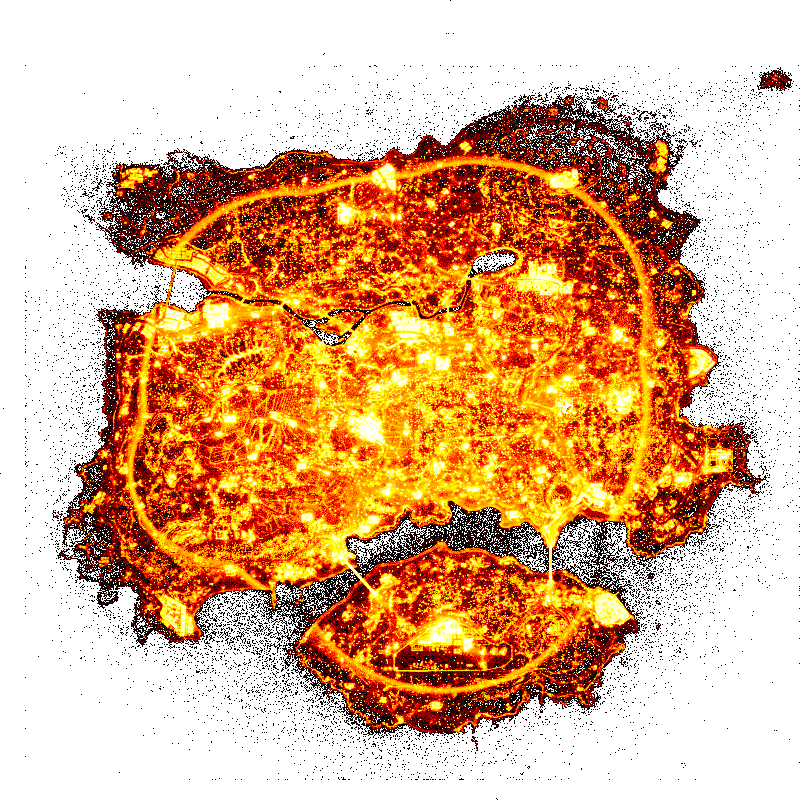

In [137]:
cvs = ds.Canvas(plot_width=800, plot_height=800)

# Aggregate the points and render the image
agg = cvs.points(er.iloc[: , 3:5], 'killer_position_x', 'killer_position_y')
img = tf.shade(agg, cmap=Hot, how='eq_hist')

# Display the image
img

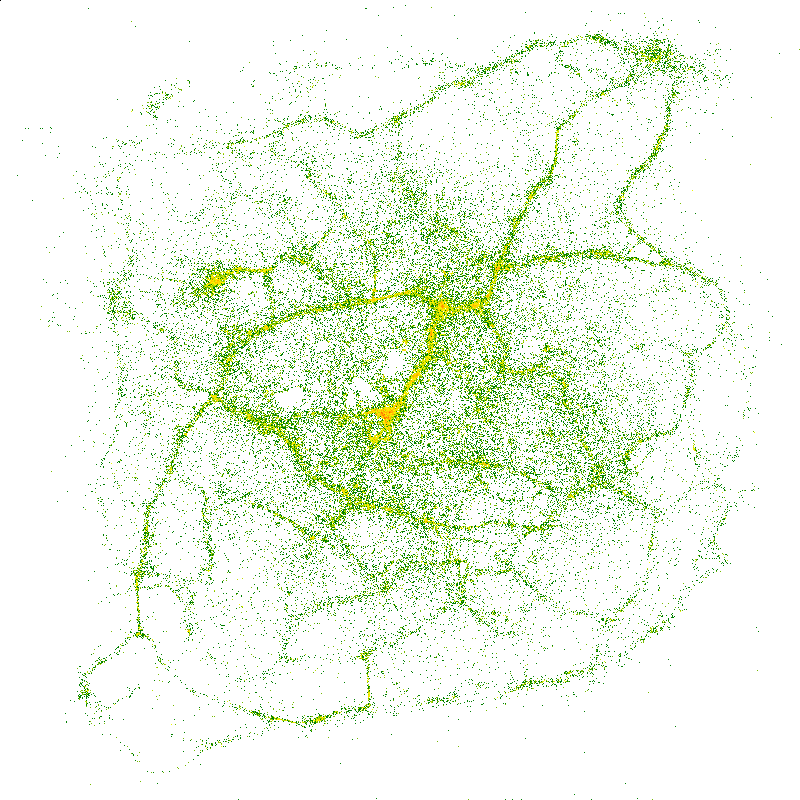

In [128]:
cvs = ds.Canvas(plot_width=800, plot_height=800)

# Aggregate the points and render the image
agg = cvs.points(mi[mi.killed_by.isin(['Hit by Car'])].iloc[: , 3:5], 'killer_position_x', 'killer_position_y')
img = tf.shade(agg, cmap=["green", "yellow", 'orange', "red", "brown", 'black'], how='log')

# Display the image
img

In [139]:
pil_image = tf.Image(img).to_pil()

# PIL 이미지를 파일로 저장 (예: PNG 형식으로 저장)
output_path = ".\erangel_kill.png"
pil_image.save(output_path)

In [28]:
er[er.killed_by.isin(['Kar98k', 'M24', 'AWM', 'Mk14'])]

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
302,Kar98k,Illmy0111,1.0,-212004.0,-486172.5,ERANGEL,2U4GBNA0YmlxiifTmjHuCGJhLNLL-lhlH9TQh47o-9IZVJ...,1391,Fuc-n-Fick,10.0,-215569.8,-496083.8
304,Kar98k,YowyyCpone,2.0,-171708.4,-537506.4,ERANGEL,2U4GBNA0YmlxiifTmjHuCGJhLNLL-lhlH9TQh47o-9IZVJ...,1546,DRAKON4IK,5.0,-151591.2,-533191.1
375,Kar98k,Xuyuan88,1.0,-367444.5,-284770.0,ERANGEL,2U4GBNA0YmmLlZbT02zMNt2JlWQ2eYFKRG02TGemIK1RM2...,1589,SuperPigBing,8.0,-391152.2,-284914.3
469,Kar98k,HORI2MIONE,17.0,-198664.1,-237887.7,ERANGEL,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,924,anonymous999,48.0,-0.0,-0.0
477,Kar98k,sdjdd,1.0,-348392.5,-121524.5,ERANGEL,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,1636,QcnnAoneQ,7.0,-346781.6,-129334.6
...,...,...,...,...,...,...,...,...,...,...,...,...
13431044,Kar98k,SuicidalLemur,2.0,-559695.1,-306319.9,ERANGEL,2U4GBNA0YmmMW9xewhXLOYLviK-CuFaoz42eRNrefdp-yG...,1592,VoodooQc,5.0,-567392.9,-310937.3
13431073,Kar98k,tafuqin1,7.0,-683660.4,-378587.6,ERANGEL,2U4GBNA0Yml-cbzVNysT33qyG6QoGSiLdtMnGgH6K3HWL_...,1553,Calliaud,8.0,-670771.1,-372228.9
13431116,Kar98k,Ryguyking,41.0,-420365.2,-326816.5,ERANGEL,2U4GBNA0Yml-cbzVNysT33qyG6QoGSiLdtMnGgH6K3HWL_...,149,Prytaneum,47.0,-420401.2,-324800.8
13431155,Kar98k,MisterMattu,1.0,-552380.3,-584280.4,ERANGEL,2U4GBNA0Yml-cbzVNysT33qyG6QoGSiLdtMnGgH6K3HWL_...,625,zengyangbao2,26.0,-549623.3,-592812.9


In [134]:
from datashader.colors import jet

ImportError: cannot import name 'jet' from 'datashader.colors' (c:\Users\take0\학교\4-2\빅데이터\big_data_prj\lib\site-packages\datashader\colors.py)

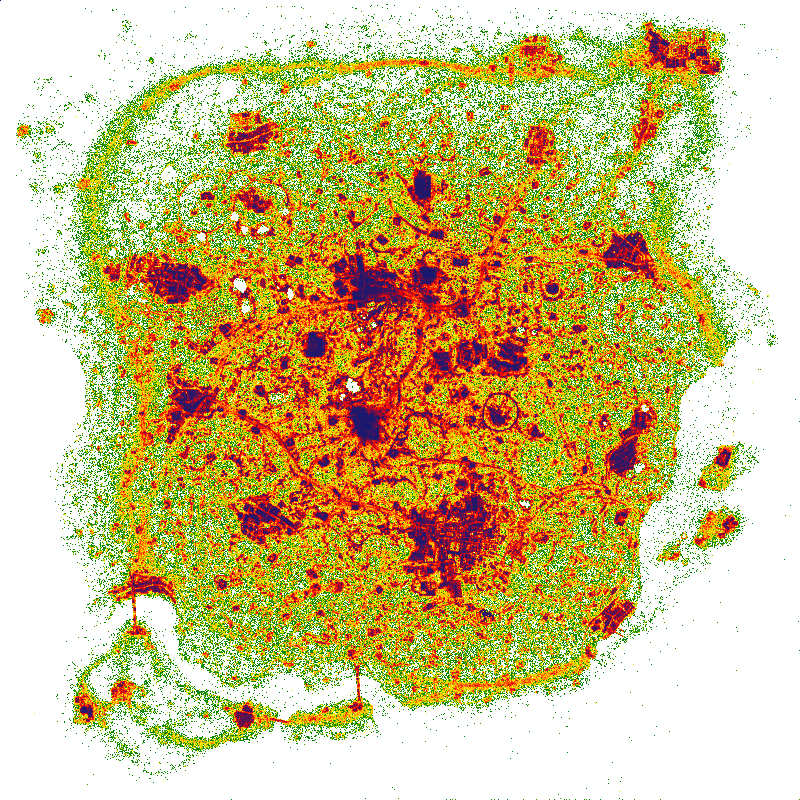

In [152]:
cvs = ds.Canvas(plot_width=800, plot_height=800)

# Aggregate the points and render the image
agg = cvs.points(er.iloc[: , 3:5], 'killer_position_x', 'killer_position_y')
img = tf.shade(agg, cmap=["green","yellow","orange", 'red', 'midnightblue'], how='eq_hist')

# Display the image
img

In [154]:
pil_image = tf.Image(img).to_pil()

# PIL 이미지를 파일로 저장 (예: PNG 형식으로 저장)
output_path = ".\erangel_kill.png"
pil_image.save(output_path)